In [6]:
import nibabel
import matplotlib.pyplot as plt                                                 #package imports
# import os

import nipype
import nipype.interfaces.fsl as fsl

241126-13:18:48,11 nipype.utils WARNING:
	 A newer version (1.8.4) of nipy/nipype is available. You are using 1.7.1


In [2]:
def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'a':
        previous_slice(ax)
    elif event.key == 'q':
        next_slice(ax)
    fig.canvas.draw()

def multi_slice_viewer(volume):
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index =60
    ax.imshow(volume[ax.index],cmap='gray')
    fig.canvas.mpl_connect('key_press_event', process_key)

def previous_slice(ax):
    """Go to the previous slice."""
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    """Go to the next slice."""
    volume = ax.volume
    ax.index = (ax.index + 1) % (volume.shape[0])
    ax.images[0].set_array(volume[ax.index])

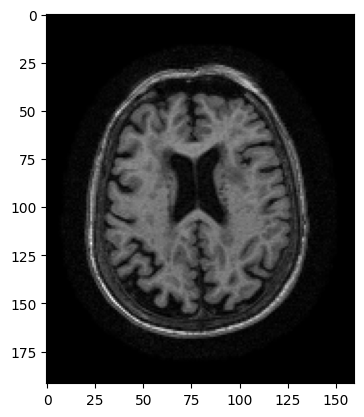

In [5]:
data_dir='C:/Users/Siddharth/Downloads/ADNI1_Complete 1Yr 1.5T_small/ADNI/141_S_1152/MPR__GradWarp__B1_Correction__N3__Scaled/2006-12-26_15_23_11.0\I48590/'                                             #image directory
# img=nibabel.load(os.path.join(path,'ADNI_141_S_1152_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070411123107490_S24487_I48590.nii'))                           #loading the image
img=nibabel.load(data_dir + 'ADNI_141_S_1152_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070411123107490_S24487_I48590.nii')                       
img_data=img.get_fdata()                                                     #accessing image array
multi_slice_viewer(img_data)
plt.show()